In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re

In [35]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\NLPCourse\\Restaurant_Reviews.tsv', sep='\t', quoting=3)
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [41]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [37]:
def process_corpus(dataset, language='english', required_words = 0):
    
    '''
    Remove punctiation, tokenize and stem the data and rejoin in an empty list.
    '''
    ps = PorterStemmer()
    corpus = []

    if required_words != 0:
        
        '''
        Provide a list of strings
        '''
        
        for j in required_words:
            all_words = stopwords.words(language).remove(j)
        
        
        for i in range(0,dataset.count()):
            review = re.sub('[^a-zA-Z]', ' ', dataset[i])
            review = review.lower()
            review = review.split()                
            review = [ps.stem(word) for word in review if not word in set(stopwords.words(language))]
            review = ' '.join(review)
            corpus.append(review)
    return corpus
    
   
    for i in range(0,dataset.count()):
        review = re.sub('[^a-zA-Z]', ' ', dataset[i])
        review = review.lower()
        review = review.split()                
        review = [ps.stem(word) for word in review if not word in set(stopwords.words(language))]
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [42]:
required_words = ["not"]

In [43]:
corpus = process_corpus(df['Review'], required_words=required_words)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)

X = cv.fit_transform(corpus).toarray()
y = df['Liked'].values

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=7,shuffle=True)

# NAIVE BAYES

In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# LOGISTIC REGRESSION

In [81]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

In [82]:
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [83]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test, y_pred)

0.732

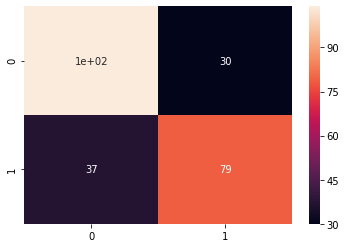

In [84]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       134
           1       0.72      0.68      0.70       116

    accuracy                           0.73       250
   macro avg       0.73      0.73      0.73       250
weighted avg       0.73      0.73      0.73       250

